# 객체를 디스크에 쓰기 

In [ ]:
!mkdir path

In [1]:
# 새로운 파일 만들기
path = 'C:/Users/anrnd/Desktop/파이썬 금융분석/path/'

In [2]:
import numpy as np
from random import gauss

In [4]:
a = [gauss(1.5,2) for i in range(1000000)]

In [3]:
import pickle
import time

#  1. open( , 'wb') 쓰기위한 파일 열기
#  2. .close()
#  3. open( , 'rb') 읽기위한 파일 열기
#  4. .close() 

객체 1개

In [5]:
pkl_file = open(path + 'data.pkl', 'wb')

In [6]:
%time pickle.dump(a, pkl_file)

Wall time: 86.6 ms


In [7]:
pkl_file

<_io.BufferedWriter name='C:/Users/anrnd/Desktop/파이썬 금융분석/path/data.pkl'>

In [8]:
pkl_file.close()

In [9]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A2A3-CC65

 C:\Users\anrnd\Desktop\파이썬 금융분석 디렉터리

2021-03-22  오전 04:41    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  271,154,454,528 바이트 남음


In [10]:
pkl_file = open(path + 'data.pkl', 'rb')
%time b = pickle.load(pkl_file)

Wall time: 244 ms


In [11]:
b[:5]

[4.3929995949676925,
 1.712182828548294,
 0.15730791954606205,
 -0.25420200168787566,
 -1.196476216330462]

In [12]:
a[:5]

[4.3929995949676925,
 1.712182828548294,
 0.15730791954606205,
 -0.25420200168787566,
 -1.196476216330462]

In [13]:
# a,b 가 같은지 확인하는 방법
# 1
np.allclose(np.array(a),np.array(b))

# 2
np.sum(np.array(a)-np.array(b))

0.0

객체 2개

In [14]:
pkl_file = open(path + 'data.pkl', 'wb')
%time pickle.dump(np.array(a), pkl_file)

Wall time: 91 ms


In [15]:
%time pickle.dump(np.array(a)**2, pkl_file)

Wall time: 99 ms


In [16]:
pkl_file.close()

In [17]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A2A3-CC65

 C:\Users\anrnd\Desktop\파이썬 금융분석 디렉터리

2021-03-22  오전 04:41    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  271,147,433,984 바이트 남음


In [18]:
pkl_file = open(path + 'data.pkl', 'rb')

In [19]:
x = pickle.load(pkl_file)          # First in First out : 자동으로 순서대로 출력 
x                                  # -> 어떤 객체에 저장되어있는지 모르는 단점

array([ 4.39299959,  1.71218283,  0.15730792, ...,  2.37661681,
       -0.80809335,  1.85101074])

In [20]:
y = pickle.load(pkl_file)
y

array([19.29844544,  2.93157004,  0.02474578, ...,  5.64830745,
        0.65301486,  3.42624077])

In [21]:
# -> 사전 객체에 다른 객체를 담아서 단점 보완

pkl_file = open(path + 'data.pkl', 'wb')
pickle.dump({'x': x, 'y': y}, pkl_file)
pkl_file.close()

In [22]:
pkl_file = open(path + 'data.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
    print(key,data[key][:4])

x [ 4.39299959  1.71218283  0.15730792 -0.254202  ]
y [19.29844544  2.93157004  0.02474578  0.06461866]


# 텍스트 파일 읽고 쓰기

In [23]:
rows = 5000
a = np.random.standard_normal((rows,5)) # 임의의 데이터 
a.round(4)

array([[-1.1569,  1.6337, -0.857 , -0.2244,  1.9391],
       [ 0.1109,  0.779 , -0.3502, -0.4234, -0.214 ],
       [-0.5049,  0.1457, -0.4854, -0.2287,  1.2582],
       ...,
       [-1.2522, -0.5416, -0.6807, -0.4644,  0.0629],
       [-0.0715, -0.5938, -1.2619, -1.3224, -1.4329],
       [-1.2224, -0.3732,  0.4989,  0.5913,  0.3004]])

In [24]:
# 날짜 - 시간 정보 추가
# pandas date_range -> 시간 생성
import pandas as pd

In [25]:
t = pd.date_range(start = '2014/1/1', periods = rows, freq = 'H')
t

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-07-27 22:00:00', '2014-07-27 23:00:00',
               '2014-07-28 00:00:00', '2014-07-28 01:00:00',
               '2014-07-28 02:00:00', '2014-07-28 03:00:00',
               '2014-07-28 04:00:00', '2014-07-28 05:00:00',
               '2014-07-28 06:00:00', '2014-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [26]:
# 자료 저장하기 위해 새파일 열기
csv_file = open(path + 'data.csv', 'w')

In [27]:
header = 'date, no1, no2, no3, no4, no5\n'
csv_file.write(header)

30

In [28]:
for t_, (no1, no2, no3, no4, no5) in zip(t,a):
    s = '%s, %f, %f, %f, %f, %f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)

In [29]:
csv_file.close()

In [30]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A2A3-CC65

 C:\Users\anrnd\Desktop\파이썬 금융분석 디렉터리

2021-03-22  오전 04:41    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  271,147,462,656 바이트 남음


In [31]:
csv_file = open(path + 'data.csv', 'r')

In [32]:
# 한줄씩 읽기
for i in range(5):
    print(csv_file.readline(), )

date, no1, no2, no3, no4, no5

2014-01-01 00:00:00, -1.156934, 1.633710, -0.856976, -0.224433, 1.939142

2014-01-01 01:00:00, 0.110883, 0.779020, -0.350203, -0.423389, -0.213966

2014-01-01 02:00:00, -0.504910, 0.145710, -0.485425, -0.228662, 1.258174

2014-01-01 03:00:00, -1.152053, 0.610256, -1.155091, -2.316096, -0.141091



In [33]:
# 한번에 읽기
csv_file = open(path + 'data.csv', 'r')
content = csv_file.readlines()
for line in content[:5]:
    print(line, )

date, no1, no2, no3, no4, no5

2014-01-01 00:00:00, -1.156934, 1.633710, -0.856976, -0.224433, 1.939142

2014-01-01 01:00:00, 0.110883, 0.779020, -0.350203, -0.423389, -0.213966

2014-01-01 02:00:00, -0.504910, 0.145710, -0.485425, -0.228662, 1.258174

2014-01-01 03:00:00, -1.152053, 0.610256, -1.155091, -2.316096, -0.141091



In [34]:
csv_file.close()

# SQL 데이터베이스

In [35]:
# 파이썬에서 사용하는 데이터베이스 : SQLite3
import sqlite3 as sq3

In [36]:
# SQL 쿼리 - 문자열 객체로 구성
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'

In [37]:
# 데이터베이스 연결
con = sq3.connect(path + 'numbs.db')

In [38]:
# 테이블 생성
con.execute(query)

OperationalError: table numbs already exists

In [39]:
# 실제로 실행되려면 commit 메서드 호출
con.commit()

# -> 데이터 베이스, 테이블 존재 -> 자료생성 가능

In [40]:
import datetime as dt

In [41]:
con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
           (dt.datetime.now(), 0.12, 7.3))

In [42]:
data = np.random.standard_normal((10000,2)).round(5)
for row in data:
    con.execute('INSERT INTO numbs VALUES(?, ?, ?)',    # execute -> 한줄씩만 가능 -> for문 사용
               (dt.datetime.now(), row[0], row[1]))     # executemany -> 한번에 행렬식으로 
con.commit()

# executemany 도 가능 하지만 날짜 - 시간 추가하기 때문에 사용 불가능

In [43]:
# 여러 자료를 한번에 가져오기 : fetchmany or fetchall

con.execute('SELECT * FROM numbs').fetchmany(10)

[('2021-03-13 00:37:08.223805', 0.12, 7.3),
 ('2021-03-13 00:37:12.789071', 1.57856, -0.16933),
 ('2021-03-13 00:37:12.789071', -1.39445, 0.77683),
 ('2021-03-13 00:37:12.789071', 1.0916, 0.79623),
 ('2021-03-13 00:37:12.789071', 0.32559, -0.98813),
 ('2021-03-13 00:37:12.789071', 0.57797, -0.11287),
 ('2021-03-13 00:37:12.789071', -2.02193, 0.7763),
 ('2021-03-13 00:37:12.789071', 0.42536, 1.28522),
 ('2021-03-13 00:37:12.789071', 0.7681, 0.11678),
 ('2021-03-13 00:37:12.789071', 1.41764, -1.41333)]

In [44]:
data

array([[-1.43886, -1.17102],
       [ 1.60596,  0.09823],
       [-0.04785, -0.30155],
       ...,
       [-0.23306,  0.29052],
       [-0.0925 , -1.03947],
       [ 0.62235,  1.37241]])

In [45]:
# 한번에 하나의 자료 가져오기 : fetchone

pointer = con.execute('SELECT * FROM numbs')

for i in range(3):
    print(pointer.fetchone())

('2021-03-13 00:37:08.223805', 0.12, 7.3)
('2021-03-13 00:37:12.789071', 1.57856, -0.16933)
('2021-03-13 00:37:12.789071', -1.39445, 0.77683)


In [46]:
con.close()

# numpy 사용

In [47]:
import numpy as np

In [48]:
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00', dtype = 'datetime64[m]')

In [49]:
len(dtimes)

3681360

In [50]:
dty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')])
data = np.zeros(len(dtimes), dtype = dty)                                                          

In [51]:
data

array([('1970-01-01T00:00', 0., 0.), ('1970-01-01T00:00', 0., 0.),
       ('1970-01-01T00:00', 0., 0.), ..., ('1970-01-01T00:00', 0., 0.),
       ('1970-01-01T00:00', 0., 0.), ('1970-01-01T00:00', 0., 0.)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [52]:
data['Date'] = dtimes

In [53]:
data

array([('2015-01-01T10:00', 0., 0.), ('2015-01-01T10:01', 0., 0.),
       ('2015-01-01T10:02', 0., 0.), ..., ('2021-12-31T21:57', 0., 0.),
       ('2021-12-31T21:58', 0., 0.), ('2021-12-31T21:59', 0., 0.)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [54]:
a = np.random.standard_normal((len(dtimes),2)).round(5)
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

In [55]:
data

array([('2015-01-01T10:00',  0.08959,  1.87325),
       ('2015-01-01T10:01', -0.15877,  0.46353),
       ('2015-01-01T10:02',  1.63551,  0.83137), ...,
       ('2021-12-31T21:57',  0.16315, -0.66129),
       ('2021-12-31T21:58',  0.31366, -0.39558),
       ('2021-12-31T21:59',  0.53141,  0.20329)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [56]:
%time np.save(path + 'array', data) # ndarray 객체 저장은 최적화 -> 속도 빨라

Wall time: 121 ms


In [57]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A2A3-CC65

 C:\Users\anrnd\Desktop\파이썬 금융분석 디렉터리

2021-03-22  오후 12:01    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  271,567,015,936 바이트 남음


In [58]:
# 읽는건 더 빨라
%time np.load(path + 'array.npy')

Wall time: 51.5 ms


array([('2015-01-01T10:00',  0.08959,  1.87325),
       ('2015-01-01T10:01', -0.15877,  0.46353),
       ('2015-01-01T10:02',  1.63551,  0.83137), ...,
       ('2021-12-31T21:57',  0.16315, -0.66129),
       ('2021-12-31T21:58',  0.31366, -0.39558),
       ('2021-12-31T21:59',  0.53141,  0.20329)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [59]:
# 더 용량큰 데이터 
data = np.random.standard_normal((10000,6000))
%time np.save(path + 'array', data)

Wall time: 1.16 s


In [60]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A2A3-CC65

 C:\Users\anrnd\Desktop\파이썬 금융분석 디렉터리

2021-03-22  오후 12:01    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  271,145,840,640 바이트 남음


In [61]:
%time np.load(path + 'array.npy')

Wall time: 326 ms


array([[-0.89003218, -1.86663163, -2.48260415, ...,  0.80257876,
        -1.78099044,  2.51163963],
       [-0.33867331, -0.44254131,  0.88795171, ...,  0.75134152,
         1.18923736,  0.3328692 ],
       [-1.03047173,  0.07794032, -0.61410147, ...,  1.26481437,
         0.11190083,  1.85550718],
       ...,
       [-0.65104304,  0.62631429, -0.12015671, ..., -1.79576055,
         0.30220692,  0.77979226],
       [ 0.08736634, -0.51349242,  0.43821668, ...,  0.08226668,
         0.03050342, -1.01478078],
       [ 2.21174051,  0.19699186, -2.21299326, ..., -1.06262214,
        -0.23037425,  0.32847438]])

In [62]:
data = 0

# 어떤 경우든 pickle 라이브러리 사용보다 속도면에서 좋다
# but, SQL 데이터베이스 기능 사용X -> PyTable 사용

# pandas 이용 입출력

SQL / pandas 비교

In [63]:
import pandas as pd
data = np.random.standard_normal((1000000,5)).round(5)
filename = path + 'numbs'

In [64]:
query = 'CREATE TABLE numbers (No1 real, No2 real, No3 real, No4 real, No5 real )'
con = sq3.connect(filename + '.db')
con.execute(query)

OperationalError: table numbers already exists

In [65]:
%%time 
con.executemany('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

Wall time: 17.2 s


In [66]:
!dir path*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A2A3-CC65

 C:\Users\anrnd\Desktop\파이썬 금융분석 디렉터리

2021-03-22  오후 12:01    <DIR>          path
               0개 파일                   0 바이트
               1개 디렉터리  271,093,280,768 바이트 남음


In [67]:
%%time 
temp = con.execute('SELECT * FROM numbers').fetchall() # 한번에 읽어오기
print(temp[:2])
temp = 0

# 테이블을 리스트 객체로 읽어 -> 속도 개선

[(-1.33278, 0.63356, 0.25084, -0.59966, -0.39682), (0.61549, -0.39092, -0.39184, -0.42031, 0.67495)]
Wall time: 8.88 s


In [68]:
%%time 
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(con.execute(query).fetchall()).round(3)

# SQL 쿼리 결과 -> numpy ndarray 객체로 바로 읽어들이기

Wall time: 4.73 s


In [69]:
res = res[::100] # 100의 배수 자리 자료들 출력

In [70]:
res

array([[ 0.615, -0.391, -0.392, -0.42 ,  0.675],
       [ 0.32 , -1.449, -2.143, -0.58 ,  1.762],
       [ 0.733, -0.304,  2.006, -0.16 , -2.108],
       ...,
       [ 0.054, -1.115,  1.002,  1.089,  0.134],
       [ 0.036, -0.867, -0.608,  0.986, -0.374],
       [ 0.766, -0.855, -0.321, -0.247, -0.213]])

In [71]:
len(res)

5001

In [72]:
import matplotlib.pyplot as plt

(-4.5, 0.5)

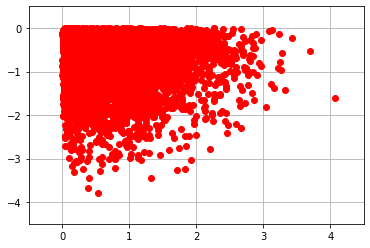

In [73]:
%matplotlib inline
plt.plot(res[:, 0], res[:, 1], 'ro')
plt.grid(True)
plt.xlim(-0.5, 4.5)
plt.ylim(-4.5, 0.5)

In [74]:
res

array([[ 0.615, -0.391, -0.392, -0.42 ,  0.675],
       [ 0.32 , -1.449, -2.143, -0.58 ,  1.762],
       [ 0.733, -0.304,  2.006, -0.16 , -2.108],
       ...,
       [ 0.054, -1.115,  1.002,  1.089,  0.134],
       [ 0.036, -0.867, -0.608,  0.986, -0.374],
       [ 0.766, -0.855, -0.321, -0.247, -0.213]])

In [75]:
res[:,0]

array([0.615, 0.32 , 0.733, ..., 0.054, 0.036, 0.766])

# SQL에서 pandas로 

In [76]:
# pandas로 읽는것이 보다 효율적

# pandas.io.sql -> SQL 데이터베이스에 저장된 자료를 다루는 함수 포함

In [77]:
import pandas.io.sql as pds

In [78]:
%time data = pds.read_sql('SELECT * FROM numbers', con)

Wall time: 10.7 s


In [79]:
data.head()

,No1,No2,No3,No4,No5
0,-1.33278,0.63356,0.25084,-0.59966,-0.39682
1,0.61549,-0.39092,-0.39184,-0.42031,0.67495
2,1.76643,0.86146,0.73394,1.39475,1.67785
3,0.48063,-0.08254,-0.88394,1.27153,-0.31758
4,1.24151,1.37312,0.46966,0.89041,0.07423


In [80]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

Wall time: 71.9 ms


,No1,No2,No3,No4,No5
1,0.61549,-0.39092,-0.39184,-0.42031,0.67495
3,0.48063,-0.08254,-0.88394,1.27153,-0.31758
10,1.18307,-1.60130,1.08153,-0.92124,0.04769
12,1.59050,-0.23510,1.60500,-0.28386,2.14697
15,0.26594,-0.68687,-0.35682,0.11577,0.89264


In [81]:
%%time 
res = data[['No1', 'No2']][((data['No1'] > 0.5) | (data['No1'] < -0.5)) & 
                           ((data['No2'] < -1) | (data['No2'] > 1))]

Wall time: 81 ms


(-5.105859000000001, 4.963299, -5.1700845, 5.5354345)

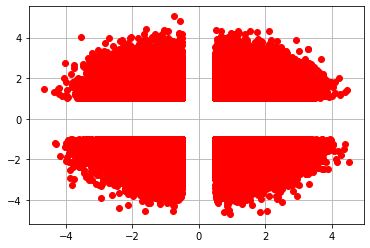

In [82]:
plt.plot(res.No1, res.No2, 'ro')
plt.grid(True)
plt.axis('tight')

pandas와 pytable 결합 -> 속도 더 개선 /
import sys /
sys._enablelegacywindowsfsencoding() 이 두줄 하면 pytable 실행가능

In [88]:
h5s = pd.HDFStore(filename + '.h5s', 'w')
%time h5s['data'] = data

Wall time: 327 ms


In [89]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: C:/Users/anrnd/Desktop/파이썬 금융분석/path/numbs.h5s

In [90]:
h5s.close()

In [91]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')
temp = h5s['data']
h5s.close()

Wall time: 175 ms


In [92]:
np.allclose(np.array(temp), np.array(data))

True

In [93]:
temp = 0

#  CSV 파일 저장

In [ ]:
%time data.to_csv(filename + '.csv')

In [ ]:
%%time
pd.read_csv(filename + '.csv')[['No1','No2','No3','No4']].hist(bins = 20)

#  엑셀파일 저장

In [ ]:
%time data[:100000].to_excel(filename + '.xlsx', index = False) 

# 자료 일부분인데도 시간 오래 걸린다

In [ ]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot()

In [ ]:
!dir path*

#  PyTables 이용 고속 입출력

In [ ]:
# HDF5 : 데이터베이스 파일 표준의 파이썬 바인딩
# -> 입출력 연산의 성능 최적화 & 가용 하드웨어 최대한 이용하도록 설계되어있다

In [94]:
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
import sys
sys._enablelegacywindowsfsencoding()

In [95]:
filename = path + 'tab.h5'
h5 = tb.open_file(filename, 'w')
# pytable : 파일 기반의 데이터베이스 제공 

In [96]:
rows = 2000000

In [97]:
row_des = {'Date': tb.StringCol(26, pos = 1),
          'No1': tb.IntCol(pos = 2),
          'No2': tb.IntCol(pos = 3),
          'No3': tb.Float64Col(pos = 4),
          'No4': tb.Float64Col(pos = 5)} # 날짜, 두개의 정수, 두개의 부동소수점 

In [98]:
filters = tb.Filters(complevel = 0) # 데이터 필터링 & 제한
tab = h5.create_table('/', 'int_floats', row_des, 
                     title = 'Integers and Floats', 
                     expectedrows = rows, filters = filters)

In [99]:
tab

/int_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [100]:
pointer = tab.row

In [101]:
pointer

/int_floats.row (Row), pointing to row #0

In [102]:
ran_int = np.random.randint(0,10000,size = (rows,2))
ran_flo = np.random.standard_normal((rows,2)).round(5) # 샘플 자료 생성

In [103]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i,0]
    pointer['No2'] = ran_int[i,1]
    pointer['No3'] = ran_flo[i,0]
    pointer['No4'] = ran_flo[i,1]
    pointer.append() # 자료 추가 후 포인터를 한행 뒤로 옮겨준다
tab.flush()  # 자료 넣은 후 commit 역활! 잊으면 안돼!

Wall time: 12.9 s


In [104]:
tab

/int_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [16]:
## Numpy 구조화 배열 활용 -> 같은 결과 

In [105]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'),
                                 ('No3', '<i8'), ('No4', '<i8')])
sarray = np.zeros(len(ran_int), dtype = dty)

In [106]:
sarray

array([(b'', 0, 0, 0, 0), (b'', 0, 0, 0, 0), (b'', 0, 0, 0, 0), ...,
       (b'', 0, 0, 0, 0), (b'', 0, 0, 0, 0), (b'', 0, 0, 0, 0)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<i8'), ('No4', '<i8')])

In [107]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:,0]
sarray['No2'] = ran_int[:,1]
sarray['No3'] = ran_flo[:,0]
sarray['No4'] = ran_flo[:,1]    

Wall time: 126 ms


In [108]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray,
               title = 'Integers and Floats',
               expectedrows = rows, filters = filters) # 위의 방법보다 빠르다 (이전 : 약 15초)

Wall time: 132 ms


/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Int64Col(shape=(), dflt=0, pos=3),
  "No4": Int64Col(shape=(), dflt=0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [109]:
h5

File(filename=C:/Users/anrnd/Desktop/파이썬 금융분석/path/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/int_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Int64Col(shape=(), dflt=0, pos=3),
  "No4": Int64Col(shape=(), dflt=0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [110]:
h5.remove_node('/', 'ints_floats_from_array') # 중복된 테이블 삭제
                                              # array쓴게 좀더 빠르다는거 보여주기위해 했던것이므로

In [111]:
# Table 객체 : 부분접근 불가능

In [112]:
tab[:3]  # 행 선택

array([(b'2021-03-22 12:10:11.767587', 2800, 5303, 1.02812, 0.54976),
       (b'2021-03-22 12:10:11.767587', 7401, 3658, 0.93334, 2.13896),
       (b'2021-03-22 12:10:11.767587', 5902, 8204, 0.61727, 0.18028)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [113]:
tab[:4]['No4']  # 열만 선택

array([0.54976, 2.13896, 0.18028, 0.93781])

In [114]:
tab[1][2]

3658

In [115]:
# Numpy 유니버셜 함수를 테이블 or 테이블의 부분집합에 적용가능
%time np.sum(tab[:]['No3'])

Wall time: 141 ms


641.8613499999997

In [116]:
%time np.sum(np.sqrt(tab[:]['No1']))

Wall time: 170 ms


133292751.38665518

Wall time: 415 ms


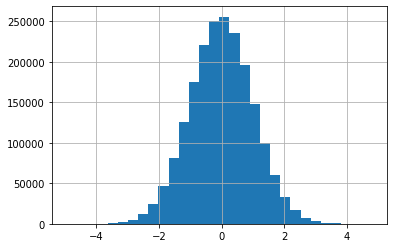

In [117]:
%%time
plt.hist(tab[:]['No3'], bins = 30)
plt.grid(True)
# 그래프 생성은 ndarray와 비슷하게 작동

In [118]:
%%time
res = np.array([(row['No3'],row['No4']) for row in
                tab.where('((No3 < -0.5) | (No3 > 0.5)) \
                & ((No4 < -1) | (No4 > 1))')])[::100]

Wall time: 725 ms


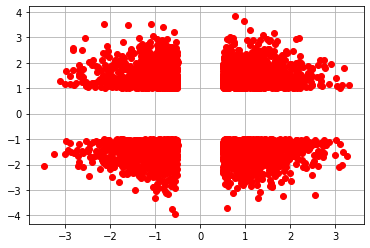

In [119]:
plt.plot(res.T[0], res.T[1], 'ro')
plt.grid(True)

In [120]:
%%time
values = tab.cols.No3[:]
print("Max %18.3f" % values.max())
print("Ave %18.3f" % values.mean())
print("Min %18.3f" % values.min())
print("Std %18.3f" % values.std())

Max              4.780
Ave              0.000
Min             -4.923
Std              1.001
Wall time: 134 ms


In [123]:
%%time
results = [(row['No1'], row['No2']) for row in
          tab.where('((No1 > 9800) | (No1 < 200)) \
          & ((No2 > 4500) & (No2 < 5500))')]

for res in results[:4]:
    print(res)

(9843, 5004)
(9857, 4677)
(116, 5370)
(195, 4973)
Wall time: 172 ms


In [124]:
%%time
results = [(row['No1'], row['No2']) for row in
          tab.where('(No1 == 1234) & (No2 > 9776)')]

for res in results:
    print(res)

(1234, 9823)
(1234, 9974)
(1234, 9829)
(1234, 9927)
(1234, 9996)
Wall time: 139 ms


# 압축된 테이블 

In [125]:
# 압축 -> 디스크 공간 절약 & 입출력 연산 성능 개선

In [126]:
# tab : 압축 x
# tabc : 압축 o

In [127]:
filename = path + 'tab.h5c'
h5c = tb.open_file(filename, 'w')

In [128]:
filters = tb.Filters(complevel = 4, complib = 'blosc') # complevel : 압축수준 0~9로 complib : 압축파일 저장 라이브러리 지정
tabc = h5c.create_table('/', 'ints_floats', sarray,
                       title = 'Integers and Floats',
                       expectedrows = rows, filters = filters)

In [130]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
               tabc.where('((No3 < -0.5) | (No3 > 0.5)) \
                          & ((No4 < -1) | (No4 > 1))')])[::100] # 난 왜 더 빠를까..? p.242와 p.244 비교

Wall time: 345 ms


In [131]:
%time arr_non = tab.read()

Wall time: 118 ms


In [133]:
%time arr_com = tabc.read()  # 읽기 속도 : 압축한게 훨씬 오래 걸린다
                             # BUT, 압축 -> 디스크 공간 절약 -> 백업, 서버 사이 or 데이터 센터 사이 대량 자료 전성에 중요

Wall time: 252 ms


In [134]:
h5c.close()

# 배열 다루기

In [43]:
# pytable에서도 ndarray 빠르고 효율적으로 읽거나 저장 가능

In [135]:
%%time
arr_int = h5.create_array('/', 'integers', ran_int)
arr_flo = h5.create_array('/', 'floats', ran_flo)
# -> 한줄씩 table에 쓰는것 보다 훨씬 빠르다 p.238과 p.245비교

Wall time: 70.8 ms


In [136]:
h5

File(filename=C:/Users/anrnd/Desktop/파이썬 금융분석/path/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(2000000, 2)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/int_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/integers (Array(2000000, 2)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [137]:
h5.close()

# out-of-memory 연산

In [47]:
# 메모리보다 큰 배열의 연산을 구현 가능하게 해준다

In [138]:
filename = path +'array.h5'
h5 = tb.open_file(filename, 'w')

In [49]:
# EArray : 확장 가능 배열??

In [139]:
# 첫 번째 차원 : 확장가능, 두 번째 차원 : 1000개의 고정 폭 
n = 1000
ear = h5.create_earray(h5.root, 'ear',
                     atom = tb.Float64Atom(),
                     shape = (0,n))

In [142]:
%%time
rand = np.random.standard_normal((n,n))
for i in range(300):
    ear.append(rand)
ear.flush()

Wall time: 6 s


In [143]:
ear  # chunkshape 질문

/ear (EArray(1050000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [144]:
ear.size_on_disk # 객체크기 : 6GB

8400000000

수치 표현식을 효율적으로 : Expr 모듈

In [145]:
out = h5.create_earray(h5.root, 'out',
                      atom = tb.Float64Atom(),
                      shape = (0, n))

In [146]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')  # 수치 표현식 -> 문자열로 입력
expr.set_output(out, append_mode = True)         # 결과 저장할 디스크 기반의 배열 설정
%time expr.eval()                                # 계산 -> 저장

Wall time: 1min 2s


/out (EArray(1050000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [147]:
out[0,:10]

array([ 1.87604805, -0.46224736, -1.77048422, -1.69834529,  2.0212526 ,
        1.25297381,  4.26178586, -0.06761621, -1.73252428, -0.29630488])

In [148]:
%time imarray = ear.read()

Wall time: 28.3 s


In [149]:
import numexpr as ne

In [150]:
expr = '3 * sin(imarray) + sqrt(abs(imarray))'

In [152]:
ne.set_num_threads(16)
%time ne.evaluate(expr)[0,:10]

Wall time: 25.4 s


array([ 1.87604805, -0.46224736, -1.77048422, -1.69834529,  2.0212526 ,
        1.25297381,  4.26178586, -0.06761621, -1.73252428, -0.29630488])

In [153]:
h5.close()